<a href="https://colab.research.google.com/github/fedorgrab/EAI6000/blob/master/Week_3_Lab_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from contextlib import suppress

with suppress(Exception):
  %tensorflow_version 2.x



TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

print(tf.__version__)

2.1.0


## Import the Fashion MNIST dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [4]:
train_images.shape

(60000, 28, 28)

Examine the dataset size.
1. What are the sizes of each image? 
2. How many categories are there?
3. How many images are there in the test and training sets?
4. What are the range of values for the images? 

There are 6000 images with size 28x28 pixels. 
The dataset has 10 different categories. Range of values for images is 0-255.

Preprocess the data by scaling the pixel values of all images to fall between 0 and 1.

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

To verify that the data is in the correct format  display the first 10 images from the *training set* and display the class name below each image.


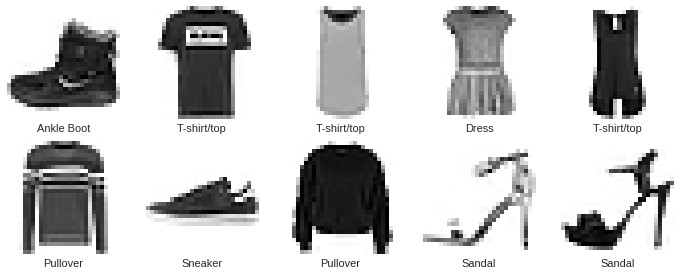

In [6]:
plt.figure(figsize=(12, 12))

for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

plt.show()

## Build the model

Using Keras, build a neural network with a single hidden layer consisting of 64 neurons. Remember that you will either have to reshape the image data into 1D vectors, or use a flatten layer at the input.
1. Set up the model layers
2. Compile the model 
3. Print the model summary

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10)
])

In [0]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Train the model

Train the model on the training images for 20 epochs.




In [10]:
model.fit(train_images, train_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4985 - accuracy: 0.8256
Epoch 2/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3724 - accuracy: 0.8666
Epoch 3/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3394 - accuracy: 0.8767
Epoch 4/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3127 - accuracy: 0.8849
Epoch 5/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2965 - accuracy: 0.8906
Epoch 6/20
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2817 - accuracy: 0.8967
Epoch 7/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2705 - accuracy: 0.8996
Epoch 8/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2583 - accuracy: 0.9039
Epoch 9/20
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2484 - accuracy: 0.9082
Epoch 10/20
60

Evaluate the accuracy of the model on the test dataset. How does it compare with the training accuracy? Is it likely overfitting or underfitting?

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print("Test accuracy: ", test_acc)

10000/10000 - 0s - loss: 0.3491 - accuracy: 0.8893
Test accuracy:  0.8893


It's likely to be a little bit overfitted, but I think it's a normal thing that test accuracy is not the same as train one.

### Make predictions

The outputs layer of the model contains predictions about the classification for each image. 

In [0]:
probability_model = tf.keras.Sequential(
    [model, tf.keras.layers.Softmax()]
)
class_predictions = model.predict_classes(test_images)
prediction_probabilities = probability_model.predict(test_images)

Examine the shape of the variable 'prediction_probabilities'. How is it different from class_predictions? What do the dimensions correspond to?

In [13]:
print(prediction_probabilities.shape)
print(class_predictions.shape)

(10000, 10)
(10000,)


`prediction_probabilities` different from `class_predictions` in dimensions. `prediction_probabilities` is array of 10000 array with 10 values each. It represents  the probability of instance being belong to each class while `class_prediction` is a array of 10000 numbers ponting to the category which is predicted by model.

The following functions plot the image and a bar graph of the predicted probabilities. Using these functions, make a plot of the first 25 test images that were incorrectly classified along with their predicted probabilities. Interpret these images - what sort of images tend to be misclassified?

In [0]:
def plot_image(predictions_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = "blue"
  else:
    color = "red"

  plt.xlabel("{} {:2.0f}% ({})".format(
    class_names[predicted_label],
    100*np.max(predictions_array),
    class_names[true_label]
    ), color=color)

def plot_value_array(predictions_array, true_label):
  plt.grid(False)
  plt.xticks(np.arange(10), list(class_names), rotation=45, ha="right")
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)


  thisplot[predicted_label].set_color("red")
  thisplot[true_label].set_color("blue")

In [0]:
missclassified_query = test_labels != class_predictions

missclassified_images = test_images[missclassified_query]
missclassified_actual_labels = test_labels[missclassified_query]
missclassified_probabilities = prediction_probabilities[missclassified_query]

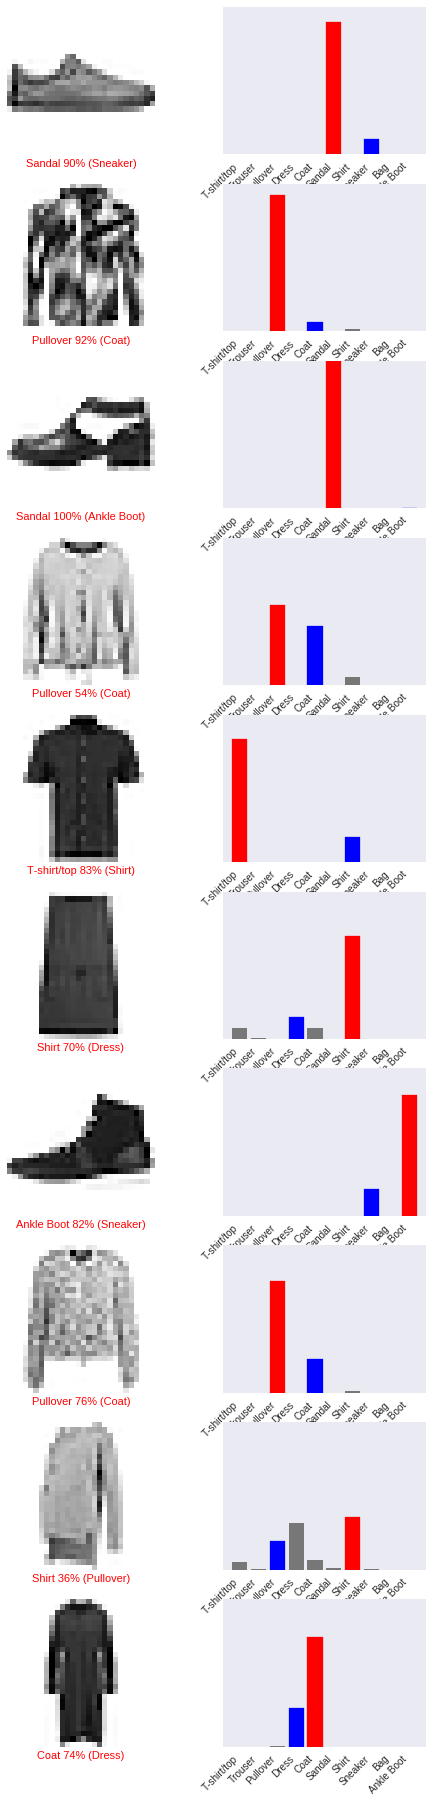

In [16]:
plt.figure(figsize=(8, 32))

for i in range(10):
    plt.subplot(10, 2, 2 * i + 1)
    plot_image(
      missclassified_probabilities[i], 
      missclassified_actual_labels[i],
      missclassified_images[i]
    )
    plt.subplot(10, 2, 2 * i + 2)
    plot_value_array(
      missclassified_probabilities[i], 
      missclassified_actual_labels[i]
    )

plt.show()

Plot a confusion matrix of the predictions. Which misclassifications are the most common?

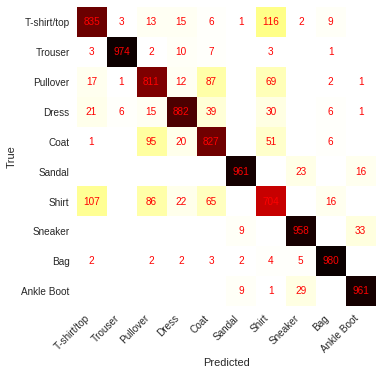

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(test_labels, class_predictions)

def plot_conf_matrix(cm, labels, scale=None):
    fig, ax = plt.subplots()
    cm_scaled = None
    if scale:
        cm_scaled = cm.copy()
        cm_scaled[cm_scaled < cm_scaled.max() / 3] = cm_scaled[cm_scaled < cm_scaled.max() / 3] * scale
        
    if cm_scaled is None:
        im = ax.imshow(cm, cmap=plt.cm.hot_r)

    else:
        im = ax.imshow(cm_scaled)
    
    ax.grid(False)
    ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_yticklabels(labels)
    ax.set_ylabel("True")
    ax.set_xlabel("Predicted")

    for i in range(100):
        if  cm[i%10, int(i/10)]:
            ax.text(int(i/10), i%10, cm[i%10,int(i/10)], ha="center", va="center", color="red")

plot_conf_matrix(cm, class_names)

The most common misclassifications were:

Shirt with T-shirt/top \
Shirt with Pullover \
Shirt with Coat \
Pullover with coat \
Sneaker and Ankle Boot